## **Dropout Layer in ANN - Mobile Price Prdiction**

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import tensorflow
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, accuracy_score

In [201]:
df = pd.read_csv('train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [202]:
df.shape

(2000, 21)

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [204]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [205]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [206]:
df['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [207]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['price_range']), 
                                                    df['price_range'], 
                                                    test_size=0.2, 
                                                    random_state=42)

In [208]:
numerical_columns = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [209]:
handle_numerical = Pipeline(steps=[
    ('impute', KNNImputer(n_neighbors=11)),
    ('scale', MinMaxScaler())
])

In [210]:
preprocessing = ColumnTransformer(transformers=[
    ('numerical', handle_numerical, numerical_columns)
])

In [211]:
X_train = preprocessing.fit_transform(X_train)
X_test = preprocessing.transform(X_test)

In [212]:
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

In [213]:
model = Sequential()

In [214]:
input_dim = X_train.shape[1]

model.add(Dense(input_dim, activation='relu'))
model.add(Dense(input_dim, activation='relu'))
model.add(Dense(input_dim, activation='relu'))
model.add(Dense(input_dim, activation='relu'))
model.add(Dense(input_dim, activation='relu'))
model.add(Dense(input_dim, activation='relu'))
model.add(Dense(input_dim, activation='relu'))
model.add(Dense(input_dim, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(input_dim, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(4, activation='softmax'))

In [215]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [216]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.2507 - loss: 1.3871 - val_accuracy: 0.3469 - val_loss: 1.3821
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3119 - loss: 1.3802 - val_accuracy: 0.3750 - val_loss: 1.3633
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3384 - loss: 1.3568 - val_accuracy: 0.3344 - val_loss: 1.3028
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4120 - loss: 1.2668 - val_accuracy: 0.5156 - val_loss: 1.0432
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5108 - loss: 1.0466 - val_accuracy: 0.6031 - val_loss: 0.7761
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5861 - loss: 0.8930 - val_accuracy: 0.7375 - val_loss: 0.6673
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6278 - loss: 0.7775 - val_accuracy: 0.8687 - val_loss: 0.5115
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7103 - loss: 0.6695 - val_accuracy: 0.8594 - 

In [217]:
y_pred = model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [218]:
y_pred = (y_pred > 0.5).astype(int)

In [219]:
accuracy_score(y_test, y_pred)

0.9275

In [220]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       105
           1       0.90      0.95      0.92        91
           2       0.86      0.90      0.88        92
           3       0.96      0.91      0.94       112

   micro avg       0.93      0.93      0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400
 samples avg       0.93      0.93      0.93       400



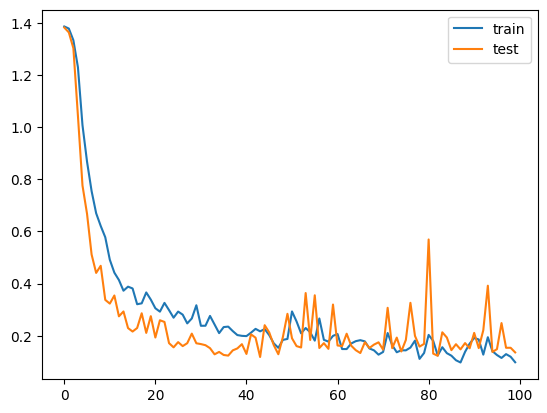

In [221]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [222]:
test = pd.read_csv('test.csv')

In [223]:
test = preprocessing.transform(test)

In [224]:
y_pred = model.predict(test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
